In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from collections import defaultdict
sns.set_style("darkgrid")


In [2]:
params = {'axes.labelsize': 'large',
          'axes.titlesize':'large'}       ###'axes.titlesize':'xx-large'
pylab.rcParams.update(params)


In [3]:
df = pd.read_csv('/Users/zihaoxu/R_repos/BLB-RF-Sim/CSV/MSE~s_clustered.csv')
if 'Unnamed: 0' in list(df):
        df.drop('Unnamed: 0', axis = 1, inplace = True)
df = df.drop(24)
df.index = range(len(df))

In [4]:
s_time_list = defaultdict(list)

for ga in df.gamma.unique():
    temp = df[df.gamma==ga]
    maxS = temp[temp['s'] == max(temp['s'])]
    minS = temp[temp['s'] == min(temp['s'])]
    print(int(maxS.s))
    print(int(minS.s))
    s_time_list['diff'].append(int(maxS.s)-int(minS.s))
    s_time_list['time_diff'].append(float(maxS['time']) - float(minS['time']))
    s_time_list['gamma'].append(ga)

16
1
16
1
16
1
13
1
5
1


In [5]:
s_time_list = pd.DataFrame(s_time_list)

In [6]:
s_time_list['ratio'] = s_time_list['time_diff']/s_time_list['diff']

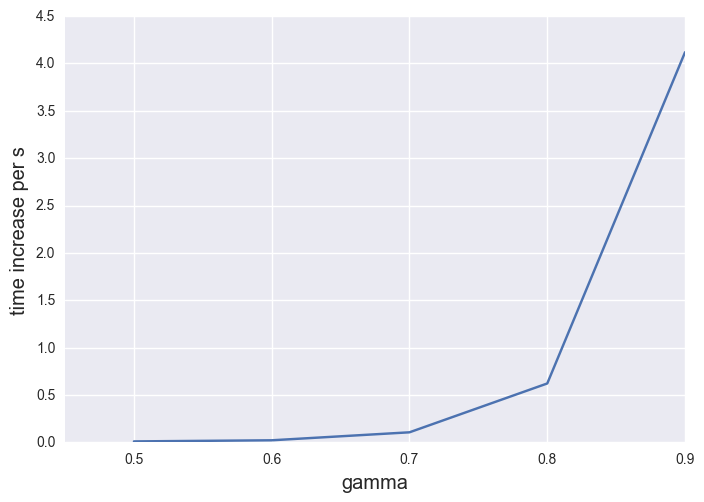

In [7]:
plt.plot(s_time_list['gamma'], s_time_list['ratio'])

plt.xlabel('gamma')
plt.ylabel('time increase per s')
sns.despine()
plt.show()

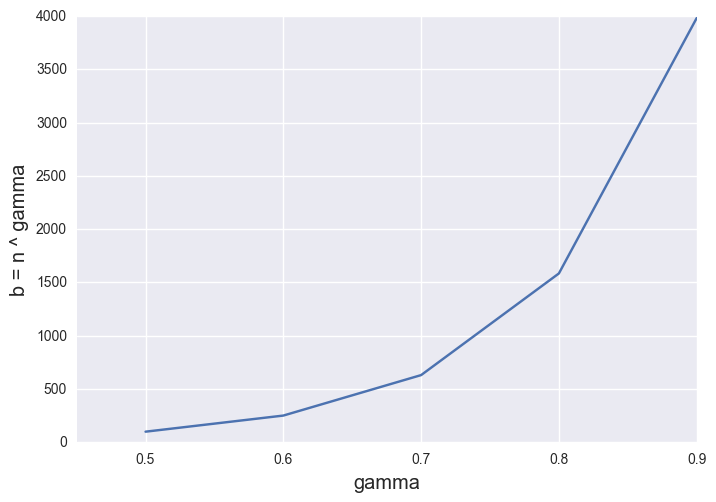

In [8]:
gammas = [.5,.6,.7,.8,.9]
b = []
n = 10000
for ga in gammas:
    b.append(n ** ga)

    
plt.plot(gammas, b)

plt.xlabel('gamma')
plt.ylabel('b = n ^ gamma')
sns.despine()
plt.show()

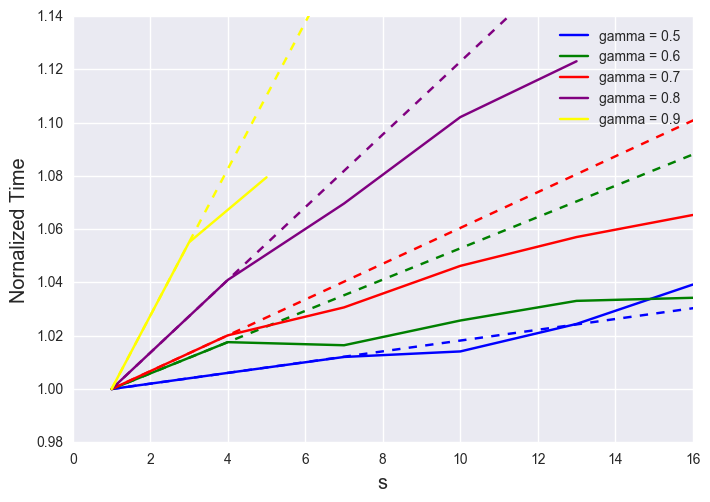

In [23]:
color_dict = {.5:'blue', .6:'g', .7:'r', .8:'purple', .9:'yellow',1:'yellow'}

for ga in df.gamma.unique():
    temp = df[df.gamma==ga]
    baseTime = min(temp.time)
    plt.plot(temp['s'], temp['time']/baseTime, c = color_dict[ga], label = 'gamma = '+str(ga))
    temp.index = range(len(temp))
    dotted_x = [temp.loc[0,'s'], temp.loc[1,'s']]
    dotted_y = [temp.loc[0,'time']/baseTime, temp.loc[1,'time']/baseTime]
    for j in range(1,16):
        dotted_x.append(dotted_x[1]+j* (dotted_x[1]-dotted_x[0]))
        dotted_y.append(dotted_y[1]+j* (dotted_y[1]-dotted_y[0]))
    plt.plot(dotted_x, dotted_y, '--', c = color_dict[ga], label = None)
    
plt.legend()
plt.xlabel('s')
plt.ylabel('Nornalized Time')
plt.xlim(0,16)
plt.ylim(0.98,1.14)
sns.despine()
plt.show()